## Capstone Project Education Company


### Step1 : Reading and Understanding the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
ed_com=pd.read_csv("Leads.csv")
ed_com.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
ed_com.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
ed_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Calculating the percentage of null values
ed_com.isnull().sum()/len(ed_com.index)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Step 2 : Data Cleaning

In [7]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score

ed_com = ed_com.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [8]:
ed_com['Country'].value_counts()/len(ed_com['Country'].index)*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Canada                   0.043290
Kuwait                   0.043290
Nigeria                  0.043290
Germany                  0.043290
South Africa             0.043290
Sweden                   0.032468
Italy                    0.021645
Ghana                    0.021645
Bangladesh               0.021645
Uganda                   0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Philippines              0.021645
Indonesia                0.010823
Switzerland   

In [9]:
## We can see that, India occurs 70% and we also have a missing values of 26%, so we drop the column.

In [10]:
ed_com.drop('Country',axis=1,inplace = True)

In [11]:
Adlist =  ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the Ad list
ed_com[Adlist] = ed_com[Adlist].apply(binary_map)

In [12]:
ed_com.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,0,0,0,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,0,0,0,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,0,0,0,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,0,0,0,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,0,0,0,No,No,No,No,No,No,Modified


In [13]:
ed_com['Newspaper'].value_counts()

0    9239
1       1
Name: Newspaper, dtype: int64

In [14]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

ed_com['Lead Source'] = ed_com['Lead Source'].replace('google', 'Google')
ed_com['Lead Source'] = ed_com['Lead Source'].replace(np.nan, 'Google')

In [15]:
ed_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
ed_com['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [17]:
ed_com['TotalVisits'].median()

3.0

In [18]:
# Replace the null values with the median
ed_com['TotalVisits']=ed_com['TotalVisits'].replace(np.nan,3.0)

In [19]:
ed_com['Page Views Per Visit'].median()

2.0

In [20]:
ed_com['Page Views Per Visit']=ed_com['Page Views Per Visit'].replace(np.nan,2.0)

In [21]:
ed_com['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

ed_com['What is your current occupation'] = ed_com['What is your current occupation'].replace(np.nan, 'No Information')

In [23]:
ed_com['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
ed_com['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
ed_com['What matters most to you in choosing a course']=ed_com['What matters most to you in choosing a course'].replace(np.nan,'Not Sure')

In [26]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

ed_com = ed_com.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [27]:
ed_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

### Step 3 : Data Analysis


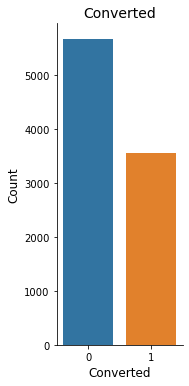

In [28]:
plot = sns.catplot(x="Converted", kind="count", data=ed_com,aspect=0.5);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

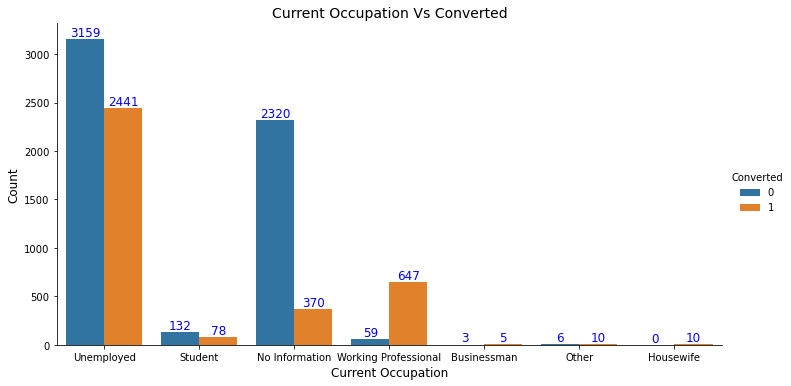

In [29]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=ed_com, aspect = 2);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

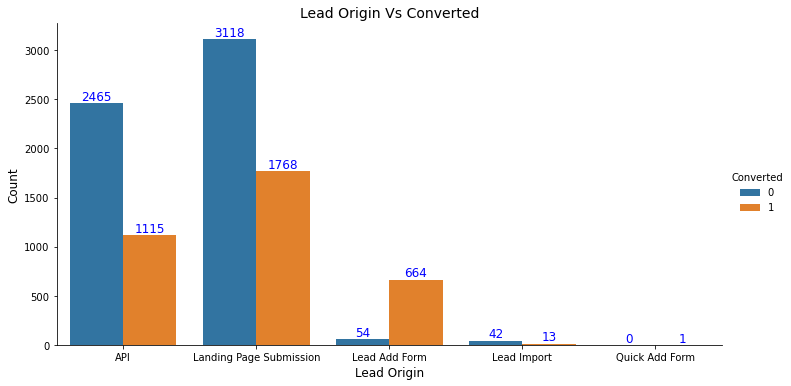

In [30]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=ed_com,aspect=2);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()
    

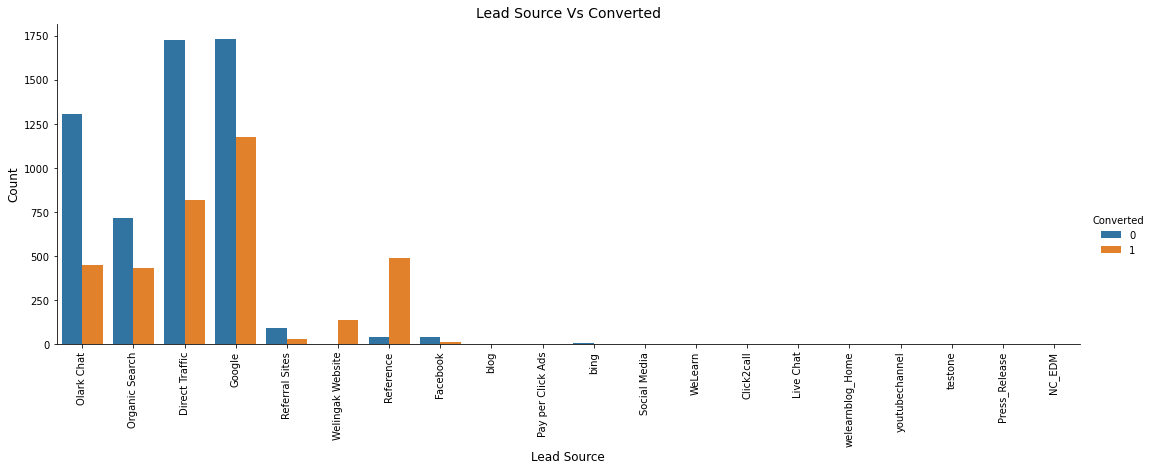

In [31]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=ed_com, aspect = 3);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
   
plt.show()

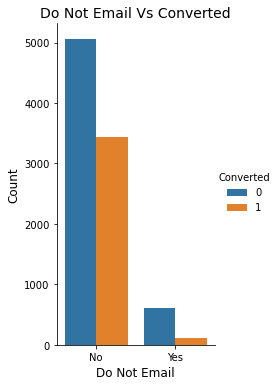

In [32]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=ed_com, aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

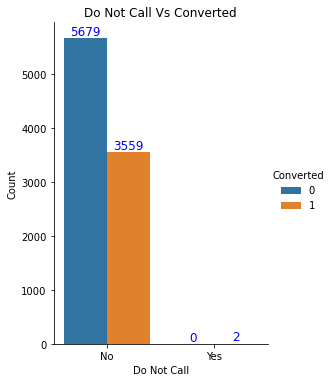

In [33]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=ed_com, aspect = 0.75);

plt.title('Do Not Call Vs Converted')
plt.xlabel("Do Not Call")
plt.ylabel("Count")
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()


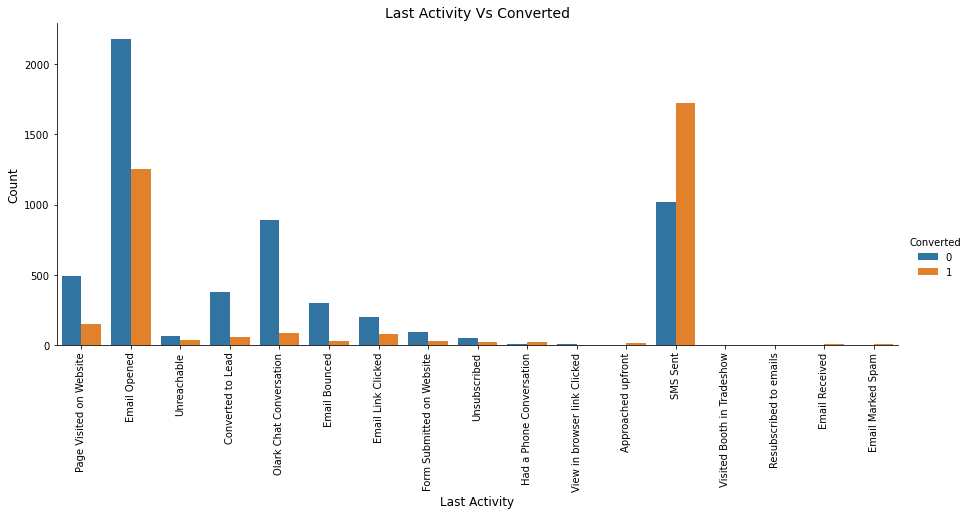

In [34]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=ed_com, aspect = 2.5);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

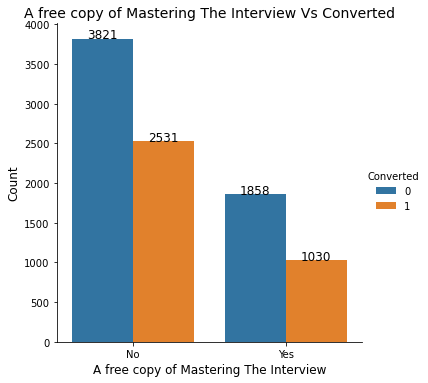

In [35]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=ed_com);

plt.title('A free copy of Mastering The Interview Vs Converted', fontsize = 14)
plt.xlabel("A free copy of Mastering The Interview", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center')
plt.show()

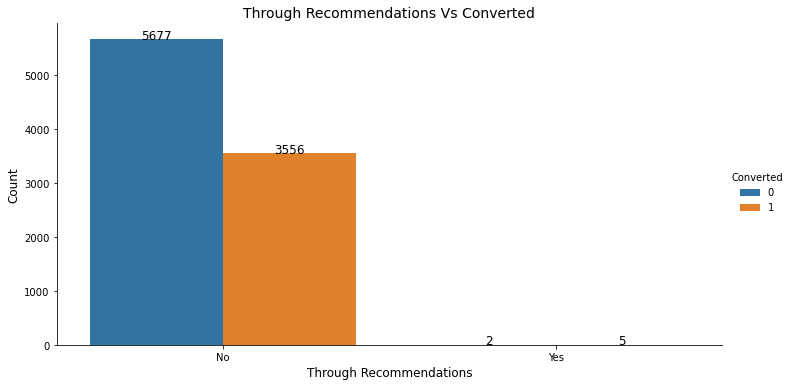

In [36]:
#Through Recommendations
plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=ed_com,aspect=2);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center')

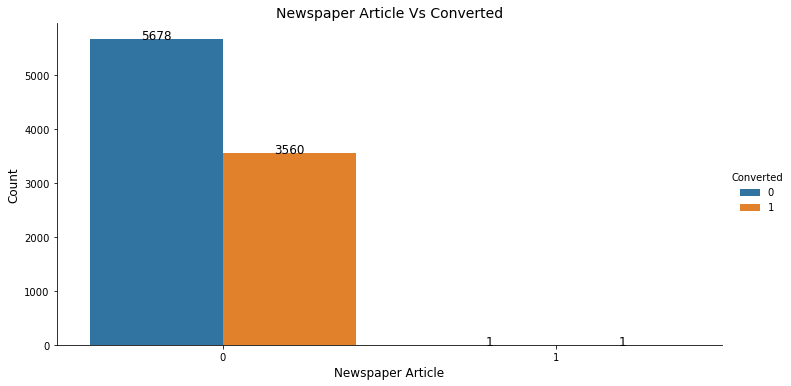

In [37]:
# Newspaper Article
plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=ed_com,aspect=2);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center')

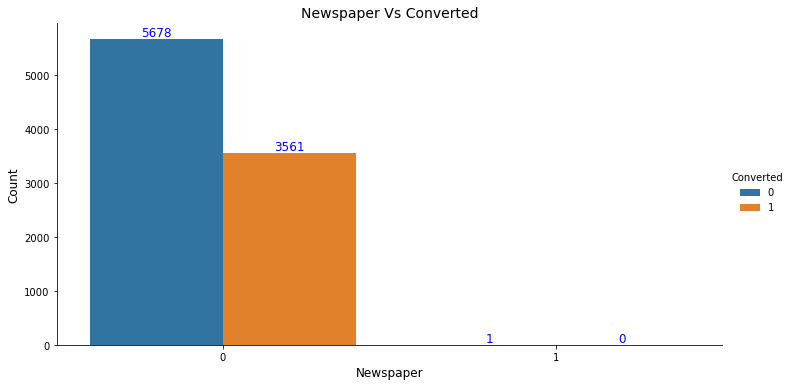

In [38]:
# Newspaper 
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=ed_com,aspect=2);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

In [39]:
ed_com.drop('Newspaper',axis=1,inplace=True)

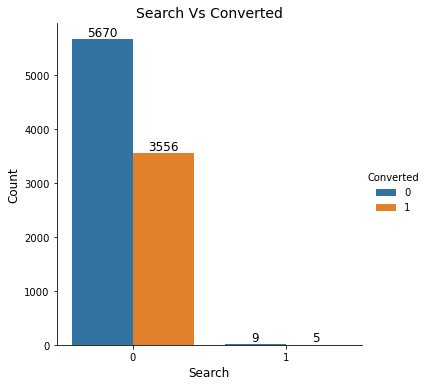

In [40]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=ed_com, aspect=1);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

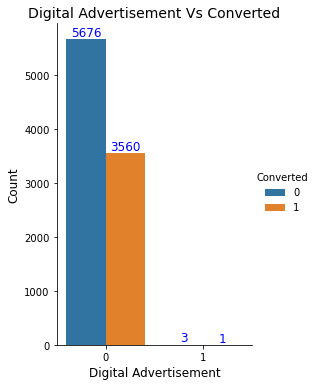

In [41]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=ed_com, aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

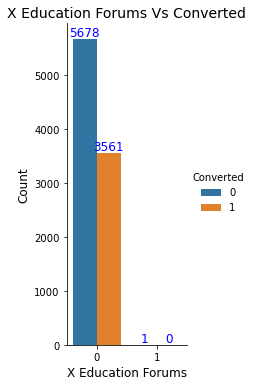

In [42]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=ed_com, aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

In [43]:
ed_com.drop('X Education Forums',axis=1,inplace=True)

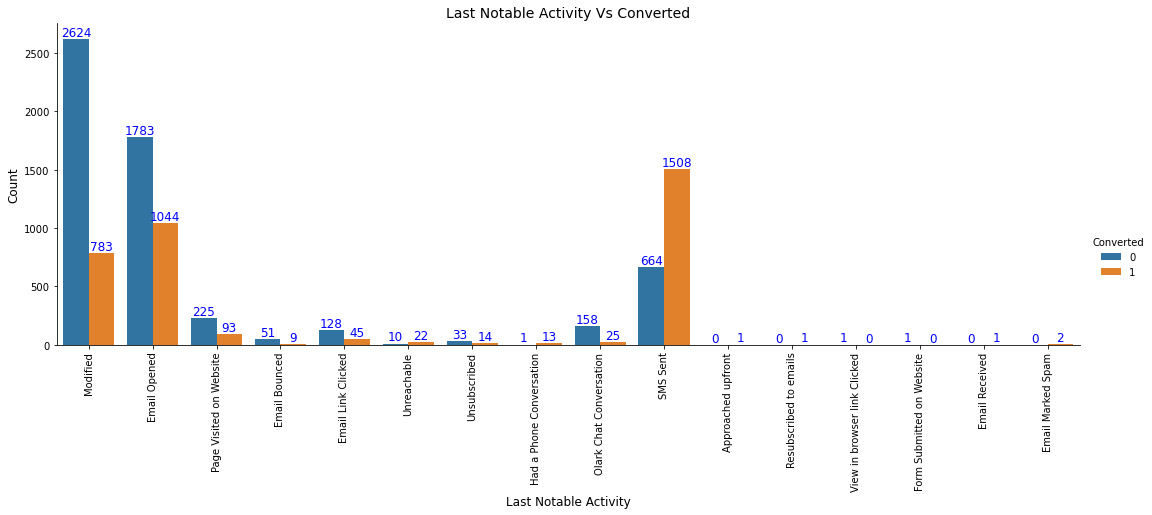

In [44]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=ed_com, aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

In [45]:
#What matters most to you in choosing a course
ed_com['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Not Sure                     2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
#Since 70% of the data is under Better Career Prospects,
#Also has around 29% as missing values, we shall go ahead and drop the column
ed_com.drop('What matters most to you in choosing a course',axis=1,inplace=True)

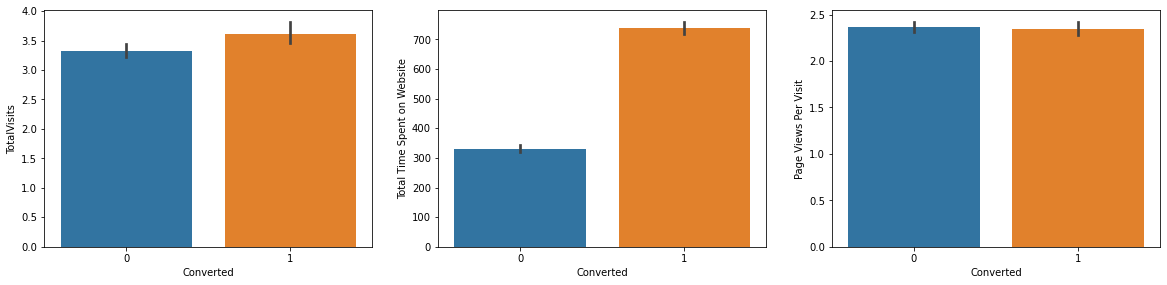

In [47]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = ed_com)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = ed_com)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = ed_com)
plt.show()

### Step 4: Data Preparation and Creating Dummies

In [48]:
ed_com['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [49]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
ed_com[variablelist] = ed_com[variablelist].apply(binary_map)

In [50]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(ed_com['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
ed_com = pd.concat([ed_com, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(ed_com['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
ed_com = pd.concat([ed_com,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(ed_com['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
ed_com = pd.concat([ed_com,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(ed_com['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
ed_com = pd.concat([ed_com,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(ed_com['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
ed_com = pd.concat([ed_com,d_last_notable_activity1], axis=1)

ed_com.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
ed_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Prospect ID                                       9240 non-null   object 
 1   Lead Number                                       9240 non-null   int64  
 2   Lead Origin                                       9240 non-null   object 
 3   Lead Source                                       9240 non-null   object 
 4   Do Not Email                                      9240 non-null   int64  
 5   Do Not Call                                       9240 non-null   int64  
 6   Converted                                         9240 non-null   int64  
 7   TotalVisits                                       9240 non-null   float64
 8   Total Time Spent on Website                       9240 non-null   int64  
 9   Page Views Per Visi

In [52]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

ed_com = ed_com.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

### Step 5 : Test Train split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = ed_com.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
# Putting response variable to y

y = ed_com['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6 : Rescaling the MinMax features

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
4715,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7132,0,0,0.007968,0.549296,0.018182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8954,0,0,0.015936,0.170335,0.024182,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5283,1,0,0.294821,0.532130,0.224182,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3003,0,0,0.011952,0.595951,0.054545,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [58]:
### Checking the Conversion Rate percentage

converted = (sum(ed_com['Converted'])/len(ed_com['Converted'].index))*100
converted

38.53896103896104

### Buyilding a StatsModel

In [59]:
import statsmodels.api as sm

In [60]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6404
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Sep 2022   Deviance:                          nan
Time:                        17:33:33   Pearson chi2:                 6.48e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.304e+16   9.28e+07   1.41e+08      0.000     1.3e+16     1.3e+16
Do Not Email                                     -9.157e+14   4.35e+06  -2.11e+08      0.000   -9.16e+14   -9.16e+14
Do Not Call                                       4.232e+15   6.72e+07   6.29e+07      0.000    4.23e+15    4.23e+15
TotalVisits                                       4.723e+15   4.93e+07   9.58e+07      0.000    4.72e+15    4.72e+15
Total Time Spent on Website                       1.431e+14   3.99e+06   3.59e+07      0.000    1.43e+14    1.43e+14
Page Views Per Visit                             -1.899e+15   2.99e+07  -6.34e+07      0.000    -1.9e+15    -1.9e+15
Search                                            3.197e+14    2.1e+07   1.52e+07      0.000     3.2e+14     3.2e+14
Newspaper Article                                 1.745e+15      1e+08   1.74e+07      0.000    1.74e+15    1.74e+15
Digital Advertisement                            -5.499e+15   6.72e+07  -8.18e+07      0.000    -5.5e+15    -5.5e+15
Through Recommendations                           6.271e+14   2.84e+07   2.21e+07      0.000    6.27e+14    6.27e+14
A free copy of Mastering The Interview           -2.982e+13    2.6e+06  -1.15e+07      0.000   -2.98e+13   -2.98e+13
LeadOrigin_API                                   -5.909e+15   6.74e+07  -8.76e+07      0.000   -5.91e+15   -5.91e+15
LeadOrigin_Landing Page Submission               -5.893e+15   6.74e+07  -8.74e+07      0.000   -5.89e+15   -5.89e+15
LeadOrigin_Lead Add Form                         -5.806e+15   6.86e+07  -8.46e+07      0.000   -5.81e+15   -5.81e+15
LeadOrigin_Lead Import                           -6.841e+15   8.27e+07  -8.27e+07      0.000   -6.84e+15   -6.84e+15
LeadSource_Click2call                             1.345e+14   9.58e+07    1.4e+06      0.000    1.34e+14    1.34e+14
LeadSource_Direct Traffic                        -5.506e+15   6.72e+07  -8.19e+07      0.000   -5.51e+15   -5.51e+15
LeadSource_Facebook                              -6.441e+15   8.25e+07  -7.81e+07      0.000   -6.44e+15   -6.44e+15
LeadSource_Google                                -5.315e+15   6.72e+07  -7.91e+07      0.000   -5.32e+15   -5.32e+15
LeadSource_Live Chat                              7.217e+13   8.33e+07   8.67e+05      0.000    7.22e+13    7.22e+13
LeadSource_Olark Chat                            -5.471e+15   6.72e+07  -8.14e+07      0.000   -5.47e+15   -5.47e+15
LeadSource_Organic Search                         -5.41e+15   6.72e+07  -8.05e+07      0.000   -5.41e+15   -5.41e+15
LeadSource_Pay per Click Ads                      -8.61e+15   9.49e+07  -9.07e+07      0.000   -8.61e+15   -8.61e+15
LeadSource_Press_Release                 

### Step 7 : Feature Selection Using RFE

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [63]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True, False, False,  True,  True, False])

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Welingak Website',
       'LastActivity_Approached upfront', 'LastActivity_Email Opened',
       'LastActivity_Had a Phone Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Unreachable', 'LastNotableActivity_Unsubscribed'],
      dtype='object')

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.5
Date:                Mon, 05 Sep 2022   Deviance:                       5276.9
Time:                        17:33:38   Pearson chi2:                 6.28e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2725      0.124    -10.235      0.000      -1.516      -1.029
Do Not Email                                    -1.2995      0.175     -7.405      0.000      -1.643      -0.956
TotalVisits                                      8.0654      2.379      3.390      0.001       3.402      12.728
Total Time Spent on Website                      4.0902      0.155     26.378      0.000       3.786       4.394
Page Views Per Visit                            -8.9739      1.204     -7.456      0.000     -11.333      -6.615
LeadOrigin_Lead Add Form                         2.7150      0.199     13.667      0.000       2.326       3.104
LeadSource_Direct Traffic                       -0.5448      0.078     -6.981      0.000      -0.698      -0.392
LeadSource_Welingak Website                     22.4379    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
LastActivity_Approached upfront                 25.1734   3.58e+04      0.001      0.999   -7.02e+04    7.03e+04
LastActivity_Email Opened                        1.0923      0.153      7.153      0.000       0.793       1.392
LastActivity_Had a Phone Conversation            0.5052      0.772      0.655      0.513      -1.007       2.018
LastActivity_SMS Sent                            1.5412      0.113     13.656      0.000       1.320       1.762
CurrentOccupation_Housewife                     24.4308   4.49e+04      0.001      1.000   -8.79e+04     8.8e+04
CurrentOccupation_No Information                -1.1609      0.088    -13.256      0.000      -1.333      -0.989
CurrentOccupation_Working Professional           2.2909      0.182     12.617      0.000       1.935       2.647
LastNotableActivity_Email Opened                -0.9675      0.178     -5.445      0.000      -1.316      -0.619
LastNotableActivity_Had a Phone Conversation     2.8945      1.339      2.162      0.031       0.270       5.519
LastNotableActivity_Modified                    -0.9930      0.112     -8.901      0.000      -1.212      -0.774
LastNotableActivity_Olark Chat Conversation     -1.0969      0.353     -3.104      0.002      -1.790      -0.404
LastNotableActivity_Unreachable                  2.2746      0.571      3.983      0.000       1.155       3.394
LastNotableActivity_Unsubscribed                 1.4179      0.526      2.698      0.007       0.388       2.448
================================================================================================================
"""

In [66]:
#Removing column with high Pvalue
col = col.drop('LastActivity_Approached upfront',1)

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.5
Date:                Mon, 05 Sep 2022   Deviance:                       5293.0
Time:                        17:33:38   Pearson chi2:                 6.29e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2536      0.124    -10.117      0.000      -1.496      -1.011
Do Not Email                                    -1.3103      0.175     -7.473      0.000      -1.654      -0.967
TotalVisits                                      7.9269      2.370      3.345      0.001       3.282      12.571
Total Time Spent on Website                      4.0947      0.155     26.439      0.000       3.791       4.398
Page Views Per Visit                            -8.9392      1.201     -7.442      0.000     -11.293      -6.585
LeadOrigin_Lead Add Form                         2.7304      0.198     13.785      0.000       2.342       3.119
LeadSource_Direct Traffic                       -0.5439      0.078     -6.980      0.000      -0.697      -0.391
LeadSource_Welingak Website                     22.4187    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
LastActivity_Email Opened                        1.0642      0.152      6.989      0.000       0.766       1.363
LastActivity_Had a Phone Conversation            0.4742      0.772      0.614      0.539      -1.039       1.988
LastActivity_SMS Sent                            1.5213      0.112     13.535      0.000       1.301       1.742
CurrentOccupation_Housewife                     24.4137   4.49e+04      0.001      1.000   -8.79e+04     8.8e+04
CurrentOccupation_No Information                -1.1675      0.088    -13.342      0.000      -1.339      -0.996
CurrentOccupation_Working Professional           2.2820      0.181     12.581      0.000       1.926       2.637
LastNotableActivity_Email Opened                -0.9583      0.178     -5.398      0.000      -1.306      -0.610
LastNotableActivity_Had a Phone Conversation     2.9088      1.339      2.172      0.030       0.284       5.534
LastNotableActivity_Modified                    -0.9836      0.111     -8.841      0.000      -1.202      -0.766
LastNotableActivity_Olark Chat Conversation     -1.1136      0.353     -3.152      0.002      -1.806      -0.421
LastNotableActivity_Unreachable                  2.2583      0.571      3.952      0.000       1.138       3.378
LastNotableActivity_Unsubscribed                 1.4091      0.526      2.681      0.007       0.379       2.439
================================================================================================================
"""

In [68]:
#Removing column with high Pvalue
col = col.drop('CurrentOccupation_Housewife',1)

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.6
Date:                Mon, 05 Sep 2022   Deviance:                       5301.3
Time:                        17:33:38   Pearson chi2:                 6.30e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2489      0.124    -10.090      0.000      -1.491      -1.006
Do Not Email                                    -1.3134      0.175     -7.490      0.000      -1.657      -0.970
TotalVisits                                      7.8641      2.366      3.324      0.001       3.227      12.501
Total Time Spent on Website                      4.1019      0.155     26.493      0.000       3.798       4.405
Page Views Per Visit                            -8.9268      1.200     -7.437      0.000     -11.279      -6.574
LeadOrigin_Lead Add Form                         2.7397      0.198     13.848      0.000       2.352       3.127
LeadSource_Direct Traffic                       -0.5450      0.078     -6.999      0.000      -0.698      -0.392
LeadSource_Welingak Website                     22.4069    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
LastActivity_Email Opened                        1.0700      0.152      7.051      0.000       0.773       1.367
LastActivity_Had a Phone Conversation            0.4657      0.772      0.603      0.547      -1.048       1.980
LastActivity_SMS Sent                            1.5165      0.112     13.503      0.000       1.296       1.737
CurrentOccupation_No Information                -1.1717      0.087    -13.393      0.000      -1.343      -1.000
CurrentOccupation_Working Professional           2.2773      0.181     12.556      0.000       1.922       2.633
LastNotableActivity_Email Opened                -0.9658      0.177     -5.454      0.000      -1.313      -0.619
LastNotableActivity_Had a Phone Conversation     2.9138      1.340      2.175      0.030       0.288       5.539
LastNotableActivity_Modified                    -0.9828      0.111     -8.839      0.000      -1.201      -0.765
LastNotableActivity_Olark Chat Conversation     -1.1184      0.353     -3.164      0.002      -1.811      -0.426
LastNotableActivity_Unreachable                  2.2550      0.572      3.944      0.000       1.134       3.376
LastNotableActivity_Unsubscribed                 1.4066      0.526      2.675      0.007       0.376       2.437
================================================================================================================
"""

In [70]:
#Removing column with high pvalue
col = col.drop('LastActivity_Had a Phone Conversation',1)

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.8
Date:                Mon, 05 Sep 2022   Deviance:                       5301.6
Time:                        17:33:38   Pearson chi2:                 6.30e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2471      0.124    -10.081      0.000      -1.490      -1.005
Do Not Email                                    -1.3158      0.175     -7.504      0.000      -1.659      -0.972
TotalVisits                                      7.8640      2.366      3.324      0.001       3.227      12.501
Total Time Spent on Website                      4.1037      0.155     26.510      0.000       3.800       4.407
Page Views Per Visit                            -8.9182      1.200     -7.431      0.000     -11.270      -6.566
LeadOrigin_Lead Add Form                         2.7474      0.198     13.904      0.000       2.360       3.135
LeadSource_Direct Traffic                       -0.5454      0.078     -7.005      0.000      -0.698      -0.393
LeadSource_Welingak Website                     22.3995    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
LastActivity_Email Opened                        1.0646      0.151      7.028      0.000       0.768       1.362
LastActivity_SMS Sent                            1.5134      0.112     13.492      0.000       1.294       1.733
CurrentOccupation_No Information                -1.1722      0.087    -13.399      0.000      -1.344      -1.001
CurrentOccupation_Working Professional           2.2823      0.181     12.595      0.000       1.927       2.637
LastNotableActivity_Email Opened                -0.9633      0.177     -5.440      0.000      -1.310      -0.616
LastNotableActivity_Had a Phone Conversation     3.3771      1.097      3.078      0.002       1.227       5.528
LastNotableActivity_Modified                    -0.9802      0.111     -8.824      0.000      -1.198      -0.763
LastNotableActivity_Olark Chat Conversation     -1.1209      0.353     -3.171      0.002      -1.814      -0.428
LastNotableActivity_Unreachable                  2.2526      0.572      3.939      0.000       1.132       3.373
LastNotableActivity_Unsubscribed                 1.4062      0.526      2.674      0.008       0.375       2.437
================================================================================================================
"""

In [72]:
#Removing column with high pvalue
col = col.drop('LeadSource_Welingak Website',1)

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.9
Date:                Mon, 05 Sep 2022   Deviance:                       5317.8
Time:                        17:33:38   Pearson chi2:                 6.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2517      0.124    -10.131      0.000      -1.494      -1.010
Do Not Email                                    -1.3123      0.174     -7.521      0.000      -1.654      -0.970
TotalVisits                                      7.8792      2.367      3.329      0.001       3.240      12.518
Total Time Spent on Website                      4.1029      0.155     26.487      0.000       3.799       4.407
Page Views Per Visit                            -8.9616      1.201     -7.464      0.000     -11.315      -6.608
LeadOrigin_Lead Add Form                         3.0041      0.194     15.518      0.000       2.625       3.384
LeadSource_Direct Traffic                       -0.5454      0.078     -7.005      0.000      -0.698      -0.393
LastActivity_Email Opened                        1.0724      0.151      7.084      0.000       0.776       1.369
LastActivity_SMS Sent                            1.5242      0.112     13.614      0.000       1.305       1.744
CurrentOccupation_No Information                -1.1732      0.088    -13.406      0.000      -1.345      -1.002
CurrentOccupation_Working Professional           2.2689      0.182     12.487      0.000       1.913       2.625
LastNotableActivity_Email Opened                -0.9633      0.177     -5.450      0.000      -1.310      -0.617
LastNotableActivity_Had a Phone Conversation     3.3846      1.097      3.085      0.002       1.234       5.535
LastNotableActivity_Modified                    -0.9800      0.111     -8.843      0.000      -1.197      -0.763
LastNotableActivity_Olark Chat Conversation     -1.1159      0.354     -3.155      0.002      -1.809      -0.423
LastNotableActivity_Unreachable                  2.2564      0.572      3.942      0.000       1.135       3.378
LastNotableActivity_Unsubscribed                 1.4022      0.528      2.658      0.008       0.368       2.436
================================================================================================================
"""

In [74]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.089828
7132    0.733211
8954    0.582932
5283    0.351552
3003    0.407197
478     0.032144
1352    0.635106
3166    0.893998
7700    0.260738
2647    0.096938
dtype: float64

In [75]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
4715,0,0.089828,4715
7132,1,0.733211,7132
8954,0,0.582932,8954
5283,0,0.351552,5283
3003,0,0.407197,3003


In [76]:
# Creating a new column predicted, with predicted converted value 1 if predicted value>0.5 else0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
4715,0,0.089828,4715,0
7132,1,0.733211,7132,1
8954,0,0.582932,8954,1
5283,0,0.351552,5283,0
3003,0,0.407197,3003,0


In [77]:
from sklearn import metrics

In [78]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3483  501]
 [ 718 1766]]


In [79]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8115337043908473


In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

print("Sensitivty"+" "+str(TP / float(TP+FN)))

# Let us calculate specificity

print("Specificity"+" "+str(TN / float(TN+FP)))

# Calculate false postive rate - predicting non conversion when leads have converted

print("Positive rate"+" "+str(FP/ float(TN+FP)))

# positive predictive value 

print ("Positive predicting value"+" "+str(TP / float(TP+FP)))

# Negative predictive value

print ("Negative predicting value"+" "+str(TN / float(TN+ FN)))

Sensitivty 0.710950080515298
Specificity 0.8742469879518072
Positive rate 0.12575301204819278
Positive predicting value 0.7790030877812086
Negative predicting value 0.8290883123065936


### Step 8 : Finding the optimal Cutoff point

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4715,0,0.089828,4715,0,1,0,0,0,0,0,0,0,0,0
7132,1,0.733211,7132,1,1,1,1,1,1,1,1,1,0,0
8954,0,0.582932,8954,1,1,1,1,1,1,1,0,0,0,0
5283,0,0.351552,5283,0,1,1,1,1,0,0,0,0,0,0
3003,0,0.407197,3003,0,1,1,1,1,1,0,0,0,0,0


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] 
# TN = confusion[0,0] 
# FP = confusion[0,1] 
# FN = confusion[1,0] 

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.640229  0.969404  0.434990
0.2   0.2  0.743816  0.929952  0.627761
0.3   0.3  0.797155  0.832528  0.775100
0.4   0.4  0.808751  0.775765  0.829317
0.5   0.5  0.811534  0.710950  0.874247
0.6   0.6  0.798856  0.604267  0.920181
0.7   0.7  0.782622  0.520129  0.946285
0.8   0.8  0.759122  0.422705  0.968876
0.9   0.9  0.712276  0.268921  0.988705


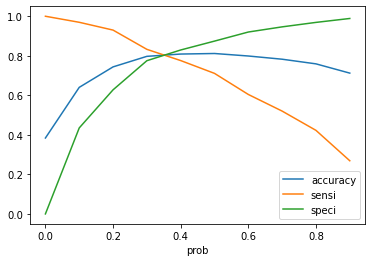

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [84]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4715,0,0.089828,4715,0,1,0,0,0,0,0,0,0,0,0,0
7132,1,0.733211,7132,1,1,1,1,1,1,1,1,1,0,0,1
8954,0,0.582932,8954,1,1,1,1,1,1,1,0,0,0,0,1
5283,0,0.351552,5283,0,1,1,1,1,0,0,0,0,0,0,0
3003,0,0.407197,3003,0,1,1,1,1,1,0,0,0,0,0,1


In [85]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
4715,0,0.089828,4715,0,1,0,0,0,0,0,0,0,0,0,0,9
7132,1,0.733211,7132,1,1,1,1,1,1,1,1,1,0,0,1,73
8954,0,0.582932,8954,1,1,1,1,1,1,1,0,0,0,0,1,58
5283,0,0.351552,5283,0,1,1,1,1,0,0,0,0,0,0,0,35
3003,0,0.407197,3003,0,1,1,1,1,1,0,0,0,0,0,1,41
478,0,0.032144,478,0,1,0,0,0,0,0,0,0,0,0,0,3
1352,1,0.635106,1352,1,1,1,1,1,1,1,1,0,0,0,1,64
3166,1,0.893998,3166,1,1,1,1,1,1,1,1,1,1,0,1,89
7700,0,0.260738,7700,0,1,1,1,0,0,0,0,0,0,0,0,26
2647,0,0.096938,2647,0,1,0,0,0,0,0,0,0,0,0,0,10


In [86]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1966
0     518
Name: final_predicted, dtype: int64

In [87]:
# check the precentage of final_predicted conversions

1966/float(1965+518)

0.7917841320982683

In [88]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8064316635745207

In [89]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3250,  734],
       [ 518, 1966]], dtype=int64)

In [90]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [91]:
# Let's see the sensitivity of our logistic regression model

print(TP / float(TP+FN))

# Let us calculate specificity

print(TN / float(TN+FP))

# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

# Positive predictive value 

print (TP / float(TP+FP))

# Negative predictive value

print (TN / float(TN+ FN))

0.7914653784219001
0.8157630522088354
0.18423694779116465
0.7281481481481481
0.8625265392781316


In [92]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion


array([[3483,  501],
       [ 718, 1766]], dtype=int64)

In [93]:
from sklearn.metrics import precision_score, recall_score

In [94]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7790030877812086

In [95]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.710950080515298

### Making Predictions on test set

In [96]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [97]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LastActivity_Email Opened,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
4608,0,0.031873,0.110915,0.048545,0,0,1,0,0,0,1,0,0,0,0,0
7935,1,0.007968,0.408891,0.036364,0,1,0,0,1,0,0,0,1,0,0,0
4043,1,0.003984,0.000880,0.018182,0,1,0,0,0,0,0,0,1,0,0,0
7821,0,0.007968,0.142165,0.036364,0,1,1,0,0,1,1,0,0,0,0,0
856,0,0.011952,0.088468,0.054545,0,0,1,0,1,0,1,0,0,0,0,0


In [98]:
X_test_sm = sm.add_constant(X_test)

In [99]:
y_test_pred = res.predict(X_test_sm)

In [100]:
y_test_pred[:10]

4608    0.294959
7935    0.020877
4043    0.014524
7821    0.711170
856     0.087273
927     0.139770
318     0.962397
1018    0.173423
8151    0.379269
1570    0.989702
dtype: float64

In [101]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
# Let's see the head

y_pred_1.head()

,0
4608,0.294959
7935,0.020877
4043,0.014524
7821,0.711170
856,0.087273


In [103]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [104]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [105]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [107]:
y_pred_final.head()

,Converted,LeadId,0
0,1,4608,0.294959
1,0,7935,0.020877
2,0,4043,0.014524
3,0,7821,0.711170
4,0,856,0.087273


In [108]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [109]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [110]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4608,1,0.294959
1,7935,0,0.020877
2,4043,0,0.014524
3,7821,0,0.711170
4,856,0,0.087273


In [111]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [112]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4608,1,0.294959,0
1,7935,0,0.020877,0
2,4043,0,0.014524,0
3,7821,0,0.711170,1
4,856,0,0.087273,0


In [113]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,4608,1,0.294959,0,29
1,7935,0,0.020877,0,2
2,4043,0,0.014524,0,1
3,7821,0,0.711170,1,71
4,856,0,0.087273,0,9
5,927,0,0.139770,0,14
6,318,1,0.962397,1,96
7,1018,0,0.173423,0,17
8,8151,0,0.379269,1,38
9,1570,1,0.989702,1,99


In [114]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    891
0    186
Name: final_predicted, dtype: int64

In [115]:
checking_test_df.head()

,Converted,final_predicted
0,1,0
6,1,1
9,1,1
10,1,1
11,1,1


In [116]:
# check the precentage of final_predicted conversions on test data

891/float(891+186)

0.8272980501392758

In [117]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8138528138528138

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1365,  330],
       [ 186,  891]], dtype=int64)

In [119]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1]
FN = confusion2[1,0] 

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8272980501392758

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8053097345132744

In [122]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7297297297297297
recall  0.8272980501392758
